In [1]:
import sys
import os
sys.path.append("../../../../src/")
#Imports
import numpy as np
import scipy as sp
import numpy.linalg as la
import matplotlib.pyplot as plt
#Custom made imports
import single_particle_sector as sps


(0.0, 1.0)

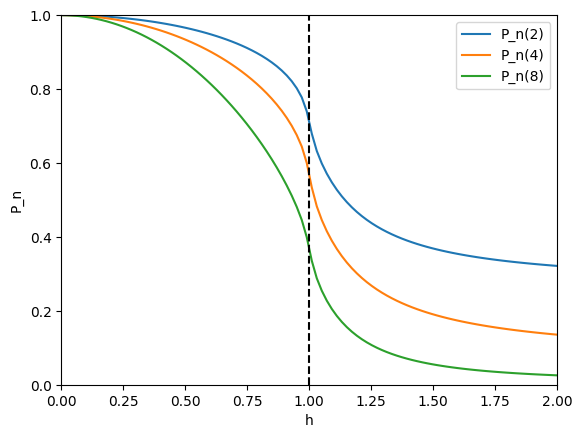

In [10]:
#Initialize Test
J = -1
L = 150
h_i = np.linspace(0,2,100)

dat = []
dat2= []
dat3= []
for h in h_i:
    H = sps.H_bdg(h,L,J)
    E,V = la.eigh(H)
    G = sps.G_tfim(V[:,:L])
    dat.append(sps.P_n(2,G,L))
    dat2.append(sps.P_n(4,G,L))
    dat3.append(sps.P_n(8,G,L))
plt.plot(h_i,dat, label = "P_n(2)")
plt.plot(h_i,dat2, label = "P_n(4)")
plt.plot(h_i,dat3, label = "P_n(8)")
plt.legend()
plt.xlabel("h")
plt.ylabel("P_n")
plt.vlines(1,0,1, color = "black", linestyle = "--")
plt.xlim(h_i[0],h_i[-1])
plt.ylim(0,1)

(0.0, 1.0)

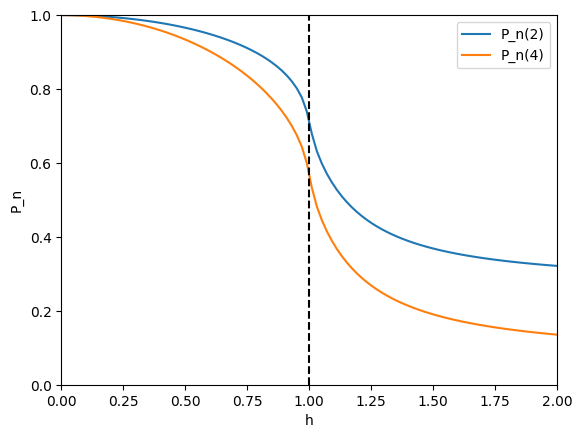

In [11]:
plt.plot(h_i,dat, label = "P_n(2)")
plt.plot(h_i,dat2, label = "P_n(4)")
#plt.plot(h_i,dat3, label = "P_n(8)")
plt.legend()
plt.xlabel("h")
plt.ylabel("P_n")
plt.vlines(1,0,1, color = "black", linestyle = "--")
plt.xlim(h_i[0],h_i[-1])
plt.ylim(0,1)

# Dependence on system size

In [12]:
system_sizes = [32,64,128]

data = []
for L in system_sizes:
    dat = []
    for h in h_i:
        H = sps.H_bdg(h,L,J)
        E,V = la.eigh(H)
        G = sps.G_tfim(V[:,:L])
        dat.append(sps.P_n(4,G,L))
    data.append(dat)


This figure shows that L = 64 is sufficient.


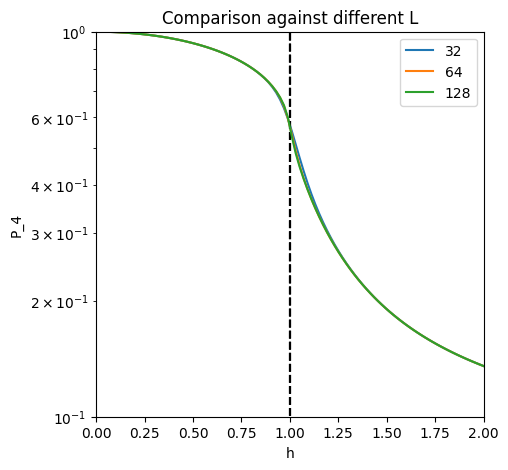

In [13]:
plt.figure(figsize = (5,5))
for i, L in enumerate(system_sizes):
    plt.title("Comparison against different L")
    plt.xlabel("h")
    plt.ylabel("P_4")
    plt.vlines(1,0,1, color = "black", linestyle = "--")
    plt.xlim(h_i[0],h_i[-1])
    plt.ylim(0.1,1)
    plt.plot(h_i, data[i], label = f"{L}")
plt.legend()
plt.yscale("log")
print("This figure shows that L = 64 is sufficient.")

# Adiabatic Tests

We re-attempt Probelm 8 of the helper paper

In [14]:
#Ground State Fidelity
def overlap(U,V):
    L = U.shape[0]//2
    U = U[:,:L]
    V = V[:,:L]
    overlap_matrix = U.conj().T @ V
    return la.det(overlap_matrix)

In [19]:
#Model Parameters
L = 64
J = -1
h0 = 0
hf = 2
taus = [.1,1,5,10,25,100]
N_steps = 1000
#Time Evolved States:
Ut_tau = []
GS_T_tau = []
times_tau =[]
for tau in taus:
    times = np.linspace(0,tau,N_steps)

    Ut = sps.TFIM_time_evolve(N_steps,tau,h0,hf,J,L)
    #Ground States
    GS_T = []
    for ti in range(N_steps):
        h = sps.h_t(times[ti],tau,h0,hf)
        H = sps.H_bdg(h,L,J)
        E,V = la.eigh(H)
        GS_T.append(V)
    Ut_tau.append(Ut)
    GS_T_tau.append(GS_T)
    times_tau.append(times)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [16]:
n = 2
#i = time step
for j in range(len(taus)):
    
    G_t =[sps.G_tfim(Ut_tau[j][ti][:,:L]) for ti in range(N_steps) ]
    G_gs = [sps.G_tfim(GS_T_tau[j][ti][:, :L]) for ti in range(N_steps)]
    P_t= [sps.P_n(n,Gi,L) for Gi in G_t]
    P_gs=[sps.P_n(n,Gi,L) for Gi in G_gs]


    fidelity = [np.abs(overlap(Ut_tau[j][ti],GS_T_tau[j][0]))**2 for ti in range(N_steps)]

    ##Plotting
    plt.figure()
    
    plt.plot(times_tau[j],P_gs,label = f"Ground State")
    plt.plot(times_tau[j],P_t, label = f"Time Evolved")
    plt.plot(times_tau[j],fidelity, label =f"Fidelity", color = "black",linestyle="--" )
:
    plt.title("Comparison against ")
    plt.title(f"P{n} , L = {L}, tau = {taus[j]}")

    plt.legend()
    plt.xlim(times_tau[j][0],times_tau[j][-1])
    plt.ylim(0,1)
    plt.show()



SyntaxError: invalid syntax (4014784655.py, line 19)

In [17]:
n = 4
#i = time step
for j in range(len(taus)):
    
    G_t =[sps.G_tfim(Ut_tau[j][ti][:,:L]) for ti in range(N_steps) ]
    G_gs = [sps.G_tfim(GS_T_tau[j][ti][:, :L]) for ti in range(N_steps)]
    P_t= [sps.P_n(n,Gi) for Gi in G_t]
    P_gs=[sps.P_n(n,Gi) for Gi in G_gs]


    fidelity = [np.abs(overlap(Ut_tau[j][ti],GS_T_tau[j][0]))**2 for ti in range(N_steps)]

    ##Plotting
    plt.figure()
    
    plt.plot(times_tau[j],P_gs,label = f"Ground State")
    plt.plot(times_tau[j],P_t, label = f"Time Evolved")
    plt.plot(times_tau[j],fidelity, label =f"Fidelity", color = "black",linestyle="--" )

    plt.title(f"P{n} , L = {L}, tau = {taus[j]}")

    plt.legend()
    plt.xlim(times_tau[j][0],times_tau[j][-1])
    plt.ylim(0,1)
    plt.show()


TypeError: P_n() missing 1 required positional argument: 'L'

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

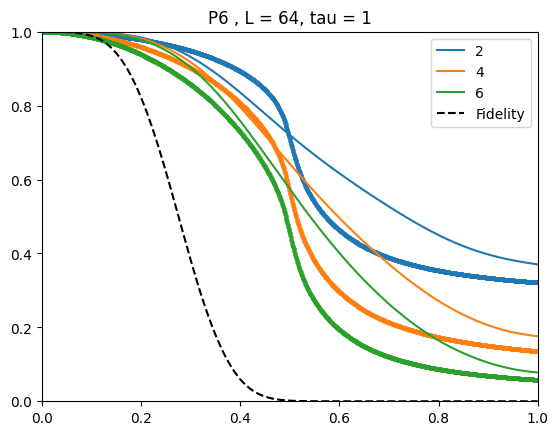

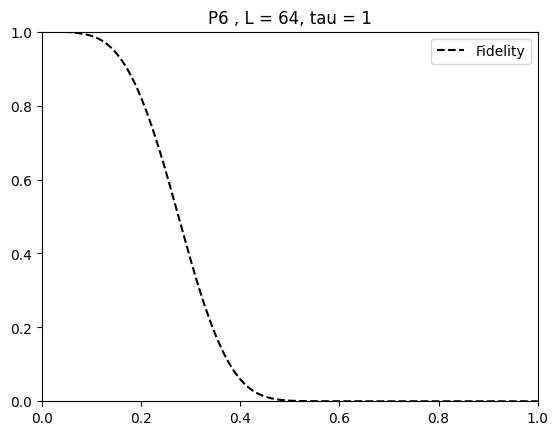

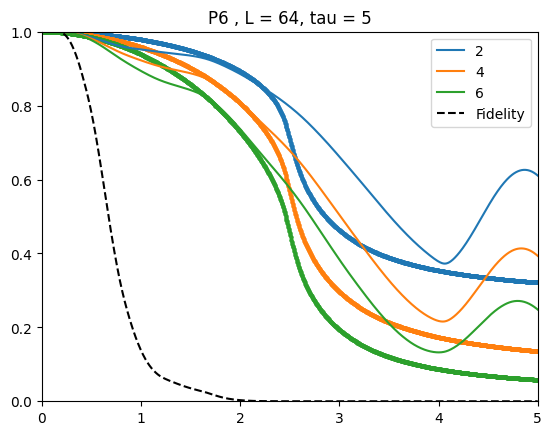

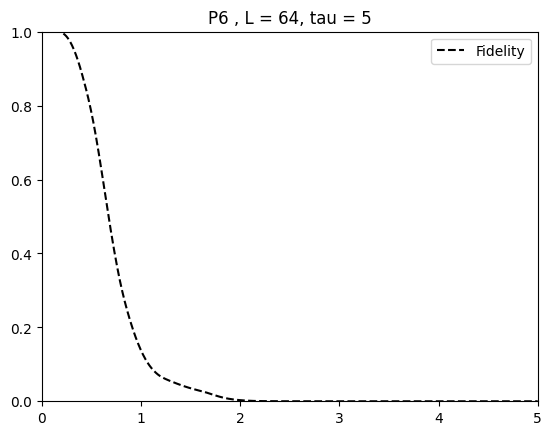

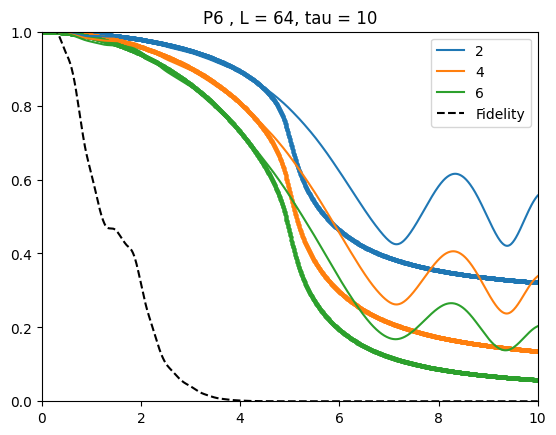

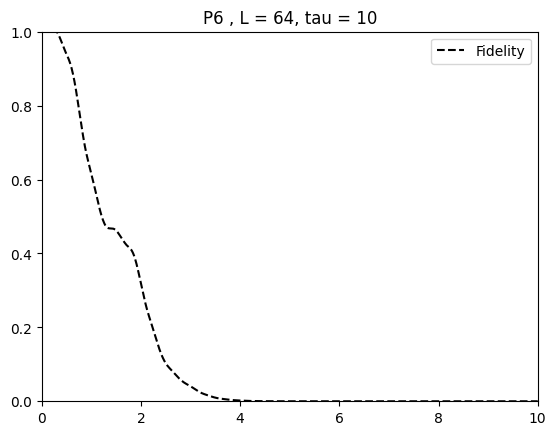

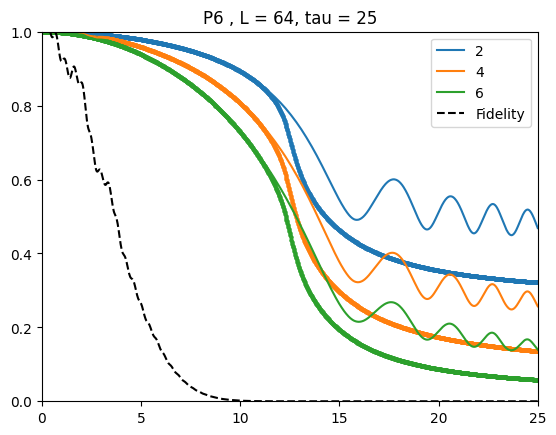

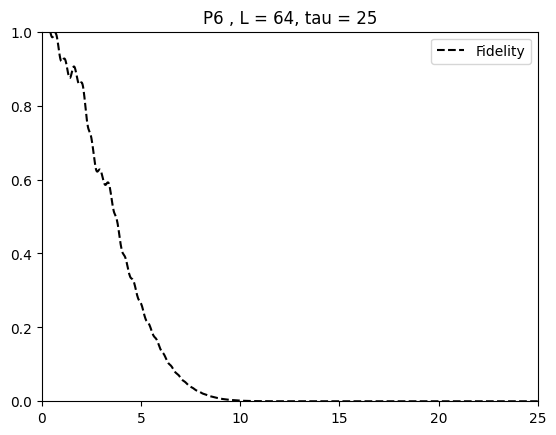

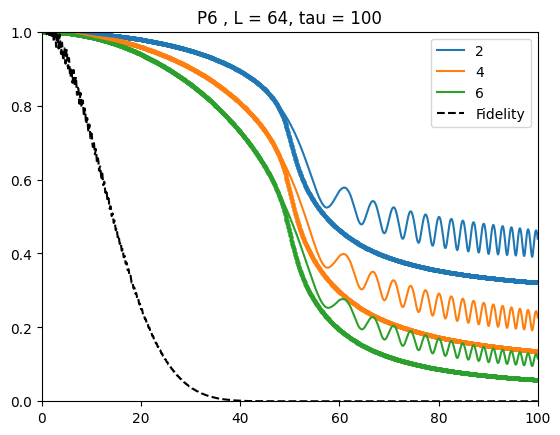

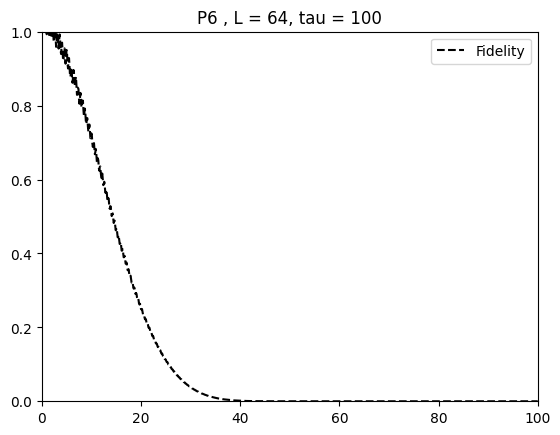

In [20]:
ns = [2,4,6]
#i = time step
for j in range(1,len(taus)):
    plt.figure()    
    G_t =[sps.G_tfim(Ut_tau[j][ti][:,:L]) for ti in range(N_steps) ]
    G_gs = [sps.G_tfim(GS_T_tau[j][ti][:, :L]) for ti in range(N_steps)]
    fidelity = [np.abs(overlap(Ut_tau[j][ti],GS_T_tau[j][0]))**2 for ti in range(N_steps)]

    for n in ns:ns = [2,4,6]
#i = time step
for j in range(1,len(taus)):
    plt.figure()    
    G_t =[sps.G_tfim(Ut_tau[j][ti][:,:L]) for ti in range(N_steps) ]
    G_gs = [sps.G_tfim(GS_T_tau[j][ti][:, :L]) for ti in range(N_steps)]
    fidelity = [np.abs(overlap(Ut_tau[j][ti],GS_T_tau[j][0]))**2 for ti in range(N_steps)]

    for n in ns:
        P_t= [sps.P_n(n,Gi,L) for Gi in G_t]
        P_gs=[sps.P_n(n,Gi,L) for Gi in G_gs]
        plt.scatter(times_tau[j],P_gs, s = 5)
        plt.plot(times_tau[j],P_t, label = f"{n}")


    ##Plotting

    
    
    plt.plot(times_tau[j],fidelity, label =f"Fidelity", color = "black",linestyle="--" )

    plt.title(f"P{n} , L = {L}, tau = {taus[j]}")

    plt.legend()
    plt.xlim(times_tau[j][0],times_tau[j][-1])
    plt.ylim(0,1)
    plt.show()

    
    
    plt.plot(times_tau[j],fidelity, label =f"Fidelity", color = "black",linestyle="--" )

    plt.title(f"P{n} , L = {L}, tau = {taus[j]}")

    plt.legend()
    plt.xlim(times_tau[j][0],times_tau[j][-1])
    plt.ylim(0,1)
    plt.show()

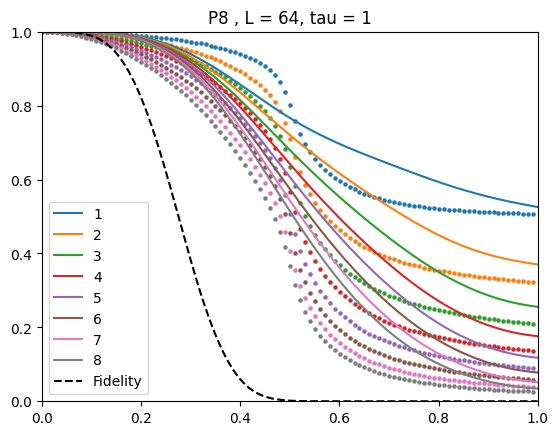

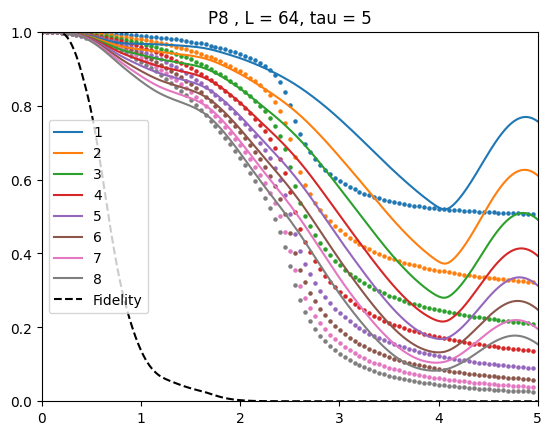

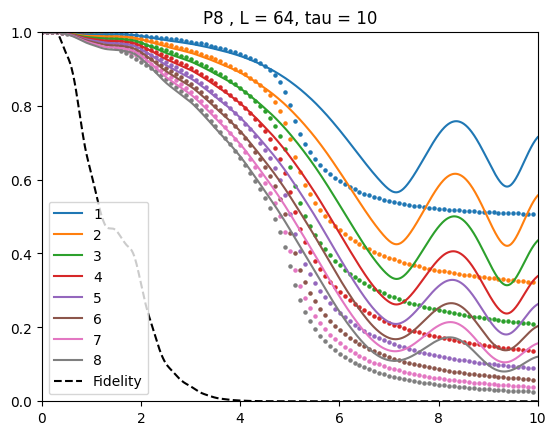

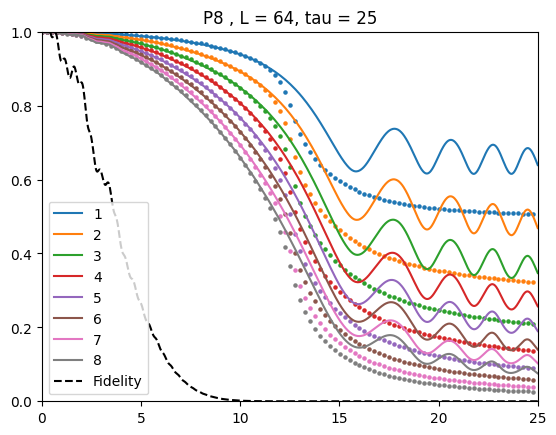

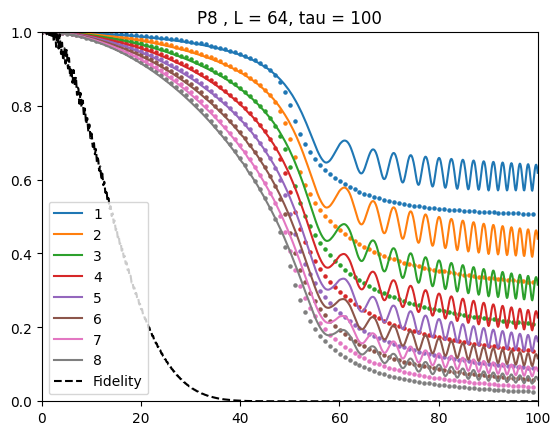

In [23]:
ns = [1,2,3,4,5,6,7,8]
#i = time step
for j in range(1,len(taus)):
    plt.figure()    
    G_t =[sps.G_tfim(Ut_tau[j][ti][:,:L]) for ti in range(N_steps) ]
    G_gs = [sps.G_tfim(GS_T_tau[j][ti][:, :L]) for ti in range(N_steps)]
    fidelity = [np.abs(overlap(Ut_tau[j][ti],GS_T_tau[j][0]))**2 for ti in range(N_steps)]

    for n in ns:
        P_t= [sps.P_n(n,Gi,L) for Gi in G_t]
        P_gs=[sps.P_n(n,Gi,L) for Gi in G_gs]
        plt.scatter(times_tau[j][::10],P_gs[::10], s = 5)
        plt.plot(times_tau[j],P_t, label = f"{n}")


    ##Plotting

    
    
    plt.plot(times_tau[j],fidelity, label =f"Fidelity", color = "black",linestyle="--" )

    plt.title(f"P{n} , L = {L}, tau = {taus[j]}")

    plt.legend()
    plt.xlim(times_tau[j][0],times_tau[j][-1])
    plt.ylim(0,1)
    plt.show()

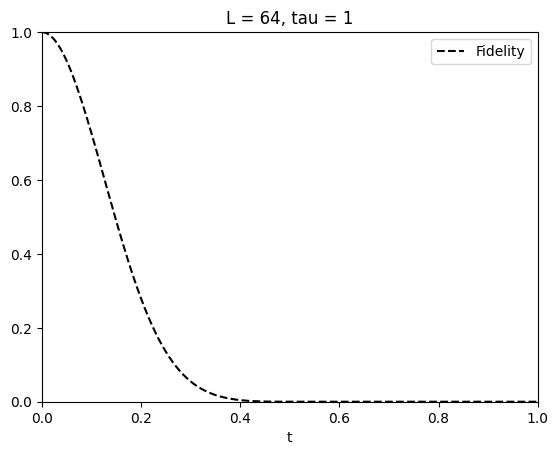

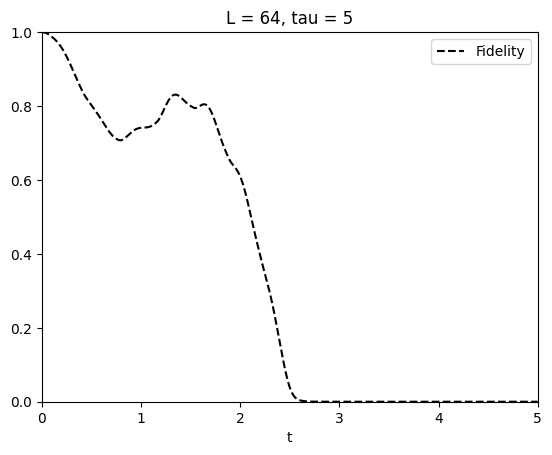

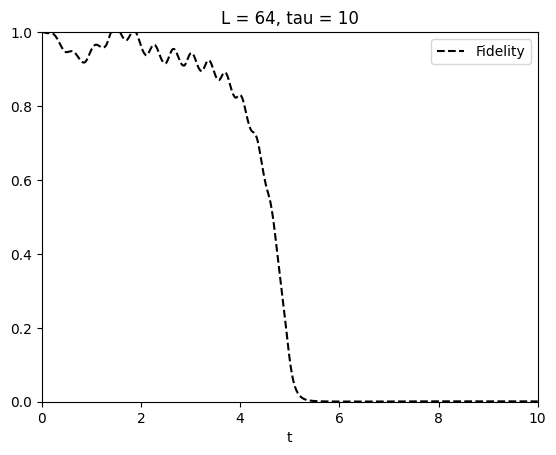

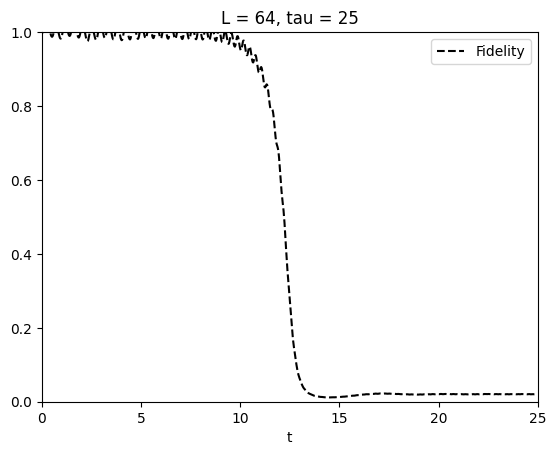

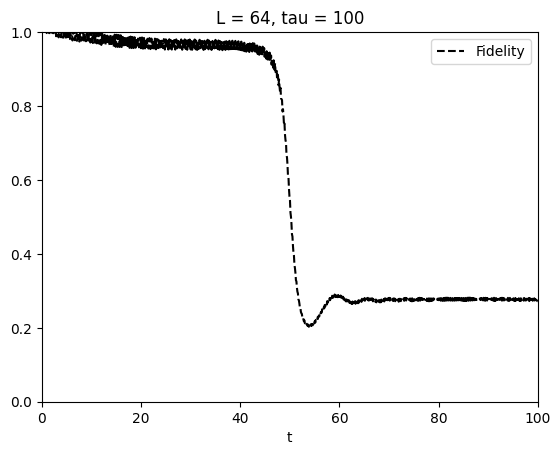

In [24]:
####LOSCHMIDT ECHO
for j in range(1,len(taus)):
    plt.figure()    
    fidelity = [np.abs(overlap(Ut_tau[j][ti],GS_T_tau[j][ti]))**2 for ti in range(N_steps)]
    ##Plotting
    plt.plot(times_tau[j],fidelity, label =f"Fidelity", color = "black",linestyle="--" )
    plt.title(f"L = {L}, tau = {taus[j]}")
    plt.legend()
    plt.xlim(times_tau[j][0],times_tau[j][-1])
    plt.ylim(0,1)
    plt.xlabel("t")
    plt.savefig(f"ground_state_fidelity_tau={taus[j]}.png")